In [1]:
pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


C:\Users\Hanna\AppData\Local\Temp\ipykernel_7988\611093814.py:29: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return df.loc[START_DATE:END_DATE]
C:\Users\Hanna\AppData\Local\Temp\ipykernel_7988\611093814.py:29: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return df.loc[START_DATE:END_DATE]
C:\Users\Hanna\AppData\Local\Temp\ipykernel_7988\611093814.py:29: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return df.loc[START_DATE:END_DATE]


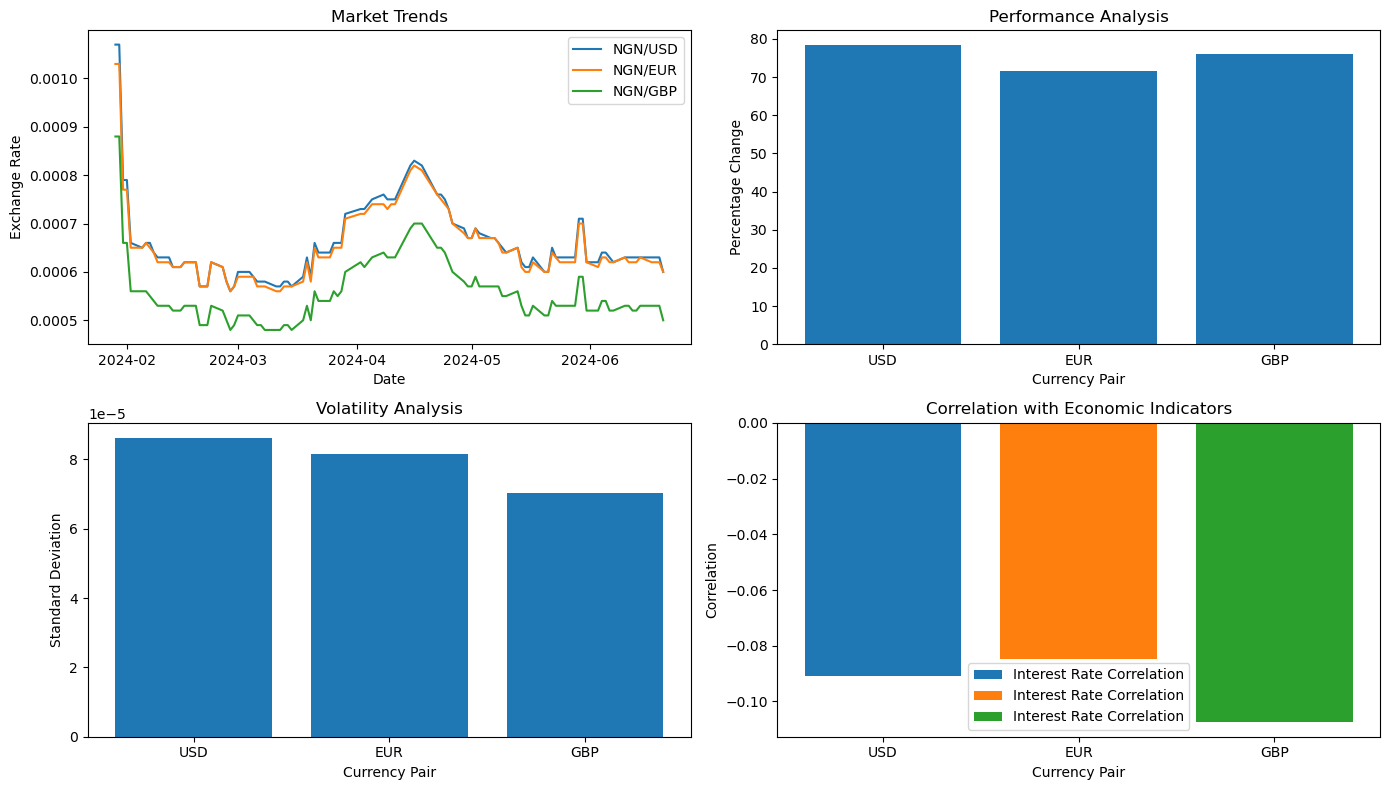

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Constants
API_KEY = 'YOUR_API_KEY'  # Replace with your actual API key
API_ENDPOINT = 'https://www.alphavantage.co/query'
CURRENCIES = ['USD', 'EUR', 'GBP']
BASE_CURRENCY = 'NGN'
START_DATE = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')
END_DATE = datetime.now().strftime('%Y-%m-%d')

def fetch_forex_data(base_currency, quote_currency, api_key):
    url = f"{API_ENDPOINT}?function=FX_DAILY&from_symbol={base_currency}&to_symbol={quote_currency}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    # Alpha Vantage returns data under 'Time Series FX (Daily)'
    rates = data.get('Time Series FX (Daily)', {})
    df = pd.DataFrame(rates).T
    df.index = pd.to_datetime(df.index)
    df = df.rename(columns={
        '1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'rate'
    })
    df = df[['rate']].astype(float)
    return df.loc[START_DATE:END_DATE]

# Fetch data
forex_data = {}
for currency in CURRENCIES:
    forex_data[currency] = fetch_forex_data(BASE_CURRENCY, currency, API_KEY)

# Visualization
plt.figure(figsize=(14, 8))

# Market Trends
plt.subplot(2, 2, 1)
for currency, data in forex_data.items():
    plt.plot(data.index, data['rate'], label=f'{BASE_CURRENCY}/{currency}')
plt.title('Market Trends')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()

# Performance Analysis
plt.subplot(2, 2, 2)
performance = {currency: (data['rate'].iloc[-1] - data['rate'].iloc[0]) / data['rate'].iloc[0] * 100 for currency, data in forex_data.items()}
plt.bar(performance.keys(), performance.values())
plt.title('Performance Analysis')
plt.xlabel('Currency Pair')
plt.ylabel('Percentage Change')

# Volatility Analysis
plt.subplot(2, 2, 3)
volatility = {currency: data['rate'].std() for currency, data in forex_data.items()}
plt.bar(volatility.keys(), volatility.values())
plt.title('Volatility Analysis')
plt.xlabel('Currency Pair')
plt.ylabel('Standard Deviation')

# Correlation with Economic Indicators (Mock Data for Illustration)
economic_data = pd.DataFrame({
    'date': pd.date_range(start=START_DATE, end=END_DATE, freq='D'),
    'interest_rate': (pd.Series(range(len(pd.date_range(start=START_DATE, end=END_DATE, freq='D')))) / 100) + 5,
    'inflation_rate': (pd.Series(range(len(pd.date_range(start=START_DATE, end=END_DATE, freq='D')))) / 100) + 2
})
economic_data['date'] = pd.to_datetime(economic_data['date'])
economic_data.set_index('date', inplace=True)

plt.subplot(2, 2, 4)
for currency, data in forex_data.items():
    merged_data = data.join(economic_data)
    correlation = merged_data['rate'].corr(merged_data['interest_rate'])
    plt.bar(currency, correlation, label=f'Interest Rate Correlation')
plt.title('Correlation with Economic Indicators')
plt.xlabel('Currency Pair')
plt.ylabel('Correlation')
plt.legend()

plt.tight_layout()
plt.show()
